In [2]:
import jupyter_black

jupyter_black.load()

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

project_dir = Path().resolve().parents[0]

In [2]:
# Load the datasets
user_list = pd.read_csv(
    project_dir
    / "data"
    / "raw"
    / "business_data_analyst_tech_challenge_2023_h2_user_data.csv"
)
transaction_summary = pd.read_csv(
    project_dir
    / "data"
    / "raw"
    / "business_data_analyst_tech_challenge_2023_h2_transaction_data.csv"
)

In [3]:
# Convert the columns into datetime columns
user_list["phone_registered_at"] = pd.to_datetime(user_list["phone_registered_at"])
user_list["verified_at"] = pd.to_datetime(user_list["verified_at"])
user_list["overall_first_deposit_timestamp"] = pd.to_datetime(
    user_list["overall_first_deposit_timestamp"]
)
transaction_summary["timestamp"] = pd.to_datetime(transaction_summary["timestamp"])

In [4]:
# Extract users who invested in the Web3 Thematic
web3_investors = transaction_summary[
    transaction_summary["web3_thematic_purchase_usd"].notna()
]["user_id"].unique()
web3_investor_data = user_list[user_list["user_id"].isin(web3_investors)]

# Extract the total number of users who started onboarding during 2023 H1
total_users = user_list["user_id"].nunique()

# Calculate the percentage of users who invested in the Web3 Thematic
web3_adoption_rate = len(web3_investors) / total_users * 100

# Project the number of users for the Golden Thematic based on the Web3 Thematic adoption rate
pessimistic_multiplier = 0.5
realistic_multiplier = 0.75
optimistic_multiplier = 1

pessimistic_projection = (
    total_users * (web3_adoption_rate * pessimistic_multiplier) / 100
)
realistic_projection = total_users * (web3_adoption_rate * realistic_multiplier) / 100
optimistic_projection = total_users * (web3_adoption_rate * optimistic_multiplier) / 100

pessimistic_projection, realistic_projection, optimistic_projection

(839.5, 1259.25, 1679.0)

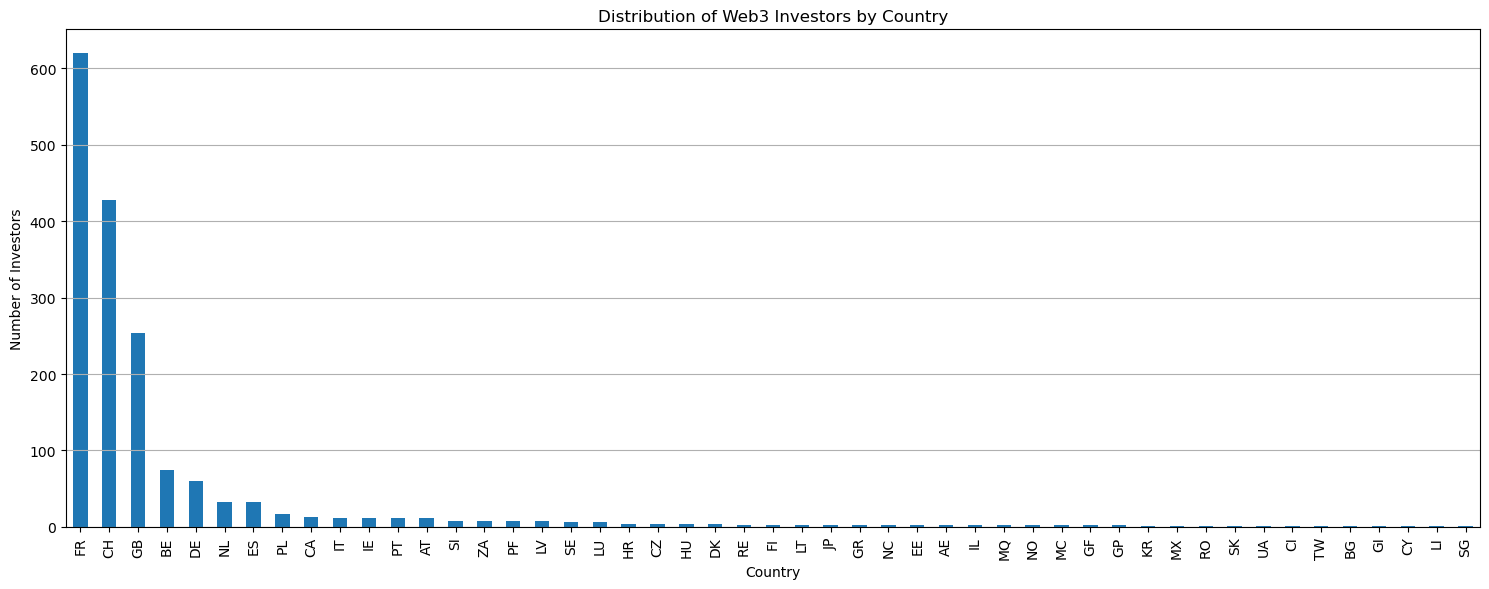

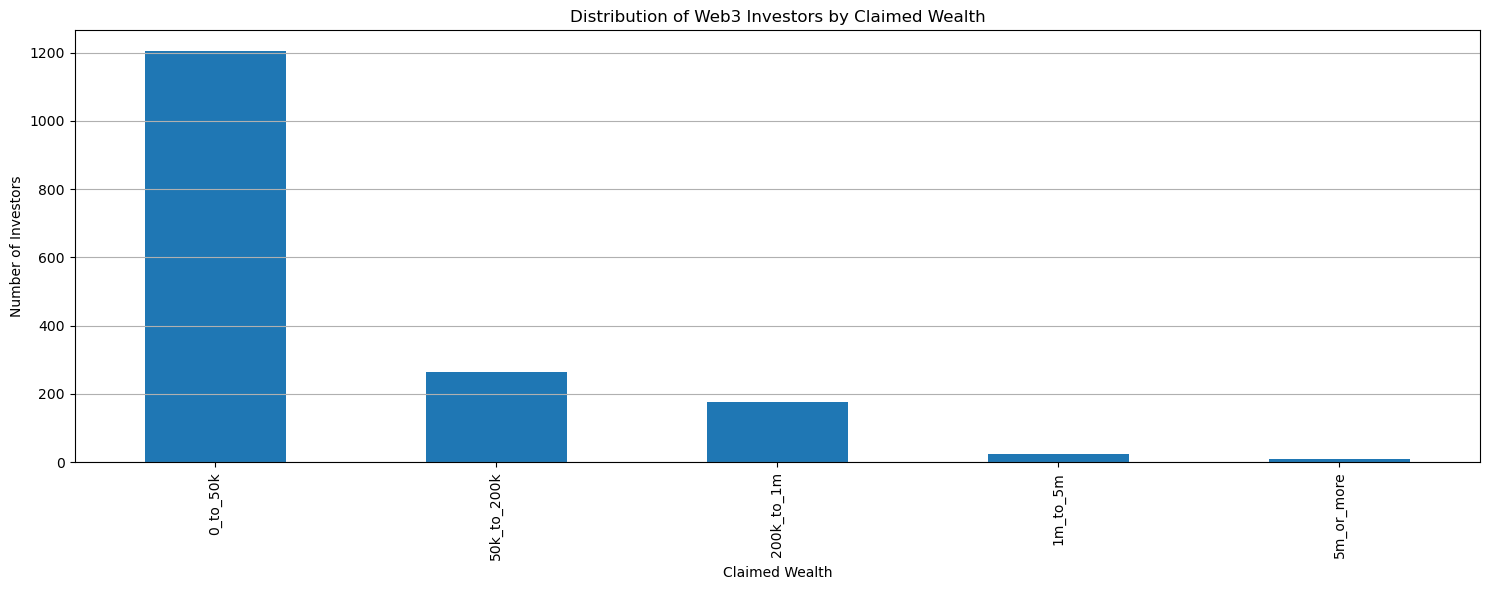

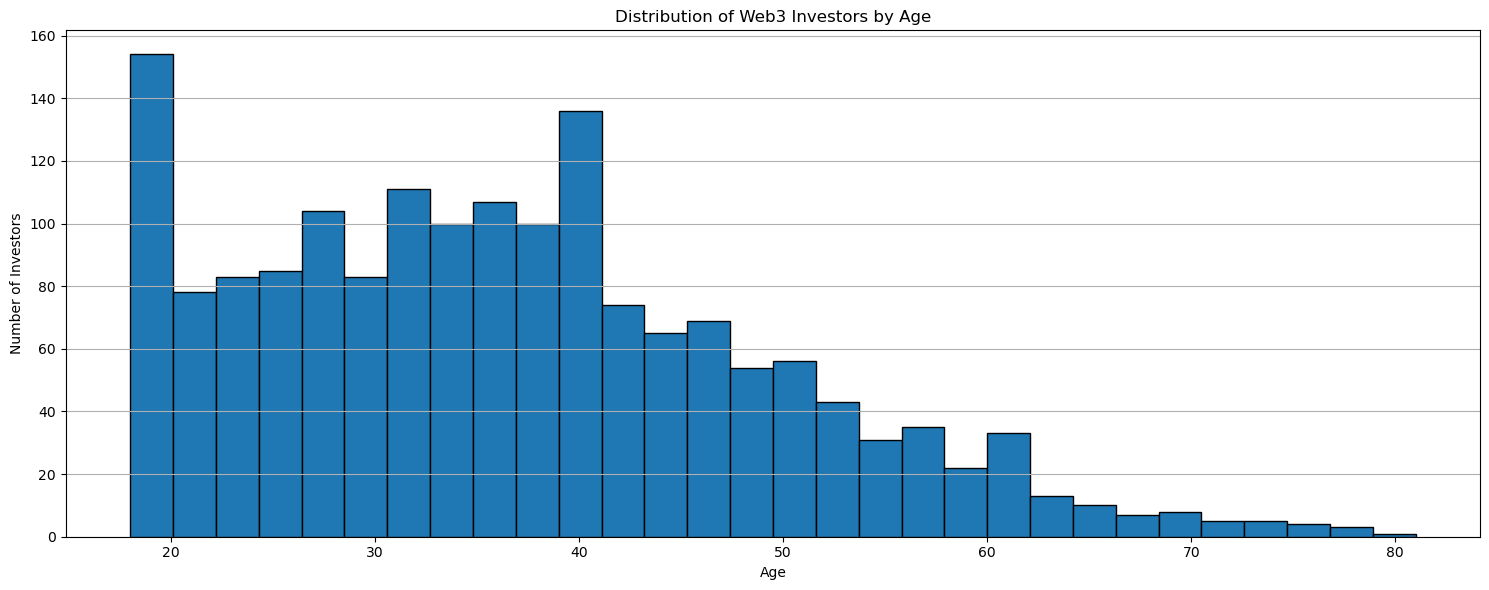

In [5]:
# Visualize user segmentation based on the Web3 Thematic data

# Distribution by Country
plt.figure(figsize=(15, 6))
web3_investor_data["country_code"].value_counts().plot(kind="bar")
plt.title("Distribution of Web3 Investors by Country")
plt.ylabel("Number of Investors")
plt.xlabel("Country")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Distribution by Claimed Wealth
plt.figure(figsize=(15, 6))
web3_investor_data["total_claimed_wealth_usd"].value_counts().plot(kind="bar")
plt.title("Distribution of Web3 Investors by Claimed Wealth")
plt.ylabel("Number of Investors")
plt.xlabel("Claimed Wealth")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Distribution by Age
plt.figure(figsize=(15, 6))
web3_investor_data["age"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Web3 Investors by Age")
plt.ylabel("Number of Investors")
plt.xlabel("Age")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [6]:
# Calculate the number of users who invested in the Golden Thematic a week after its release
launch_date = transaction_summary[
    transaction_summary["golden_thematic_purchase_usd"].notna()
]["timestamp"].min()
end_date = pd.to_datetime(launch_date) + pd.Timedelta(weeks=1)

# Filter the data for one week after the launch
week_after_launch_data = transaction_summary[
    (transaction_summary["timestamp"] >= launch_date)
    & (transaction_summary["timestamp"] <= end_date)
]

# Calculate the number of users who invested in the Golden Thematic during this period
golden_thematic_users = week_after_launch_data[
    week_after_launch_data["golden_thematic_purchase_usd"].notna()
]["user_id"].nunique()

golden_thematic_users

386

In [11]:
# Extract users who invested in Golden Thematic within the first week of its launch
launch_date_gold = transaction_summary[transaction_summary["golden_thematic_purchase_usd"].notna()]["timestamp"].min()
end_date_gold = pd.to_datetime(launch_date_gold) + pd.Timedelta(weeks=1)

golden_thematic_investors = week_after_launch_data[
    week_after_launch_data["golden_thematic_purchase_usd"].notna()
]["user_id"].unique()
golden_investor_data = user_list[user_list["user_id"].isin(golden_thematic_investors)]

# Extract users who invested in Web3 Thematic within the first week of its launch
web3_launch_date = transaction_summary[
    transaction_summary["web3_thematic_purchase_usd"].notna()
]["timestamp"].min()
web3_end_date = pd.to_datetime(web3_launch_date) + pd.Timedelta(weeks=1)
week_after_web3_launch_data = transaction_summary[
    (transaction_summary["timestamp"] >= web3_launch_date)
    & (transaction_summary["timestamp"] <= web3_end_date)
]
web3_investors_first_week = week_after_web3_launch_data[
    week_after_web3_launch_data["web3_thematic_purchase_usd"].notna()
]["user_id"].unique()
web3_investor_data_first_week = user_list[
    user_list["user_id"].isin(web3_investors_first_week)
]

In [32]:
# Compare the cohorts for Web3 and Golden Thematic by country, wealth, and age
def cohort_analysis(column):
    web3_counts = (
        web3_investor_data[column].value_counts(normalize=True) * 100
    )
    golden_counts = golden_investor_data[column].value_counts(normalize=True) * 100
    df = pd.concat([web3_counts, golden_counts], axis=1)
    df.columns = ["Web3 Thematic", "Golden Thematic"]
    df = df.fillna(0)
    return df

# By Country
country_cohort = cohort_analysis("country_code")

# By Wealth
wealth_cohort = cohort_analysis("total_claimed_wealth_usd")

# By Age
golden_investor_data["age_group"] = pd.cut(
    golden_investor_data["age"],
    bins=[0, 25, 35, 45, 60, 100],
    labels=["0-25", "25-35", "35-45", "45-60", "60+"],
)
web3_investor_data["age_group"] = pd.cut(
    web3_investor_data["age"],
    bins=[0, 25, 35, 45, 60, 100],
    labels=["0-25", "25-35", "35-45", "45-60", "60+"],
)
age_cohort = cohort_analysis("age_group")

country_cohort, wealth_cohort, age_cohort

C:\Users\Gent\AppData\Local\Temp\ipykernel_16228\1951256651.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golden_investor_data["age_group"] = pd.cut(
C:\Users\Gent\AppData\Local\Temp\ipykernel_16228\1951256651.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web3_investor_data["age_group"] = pd.cut(


(    Web3 Thematic  Golden Thematic
 FR      36.926742        37.564767
 CH      25.491364        27.979275
 GB      15.068493        13.730570
 BE       4.466945         3.367876
 DE       3.573556         4.922280
 NL       1.965456         0.259067
 ES       1.905896         1.813472
 PL       1.012507         1.036269
 CA       0.774270         2.331606
 IT       0.714711         1.036269
 IE       0.714711         0.259067
 PT       0.655152         0.259067
 AT       0.655152         1.036269
 SI       0.416915         0.518135
 ZA       0.416915         0.000000
 PF       0.416915         0.259067
 LV       0.416915         0.000000
 SE       0.357356         0.259067
 LU       0.357356         1.036269
 HR       0.238237         0.000000
 CZ       0.238237         0.000000
 HU       0.238237         0.000000
 DK       0.238237         0.000000
 RE       0.178678         0.259067
 FI       0.178678         0.000000
 LT       0.178678         0.518135
 JP       0.178678         0

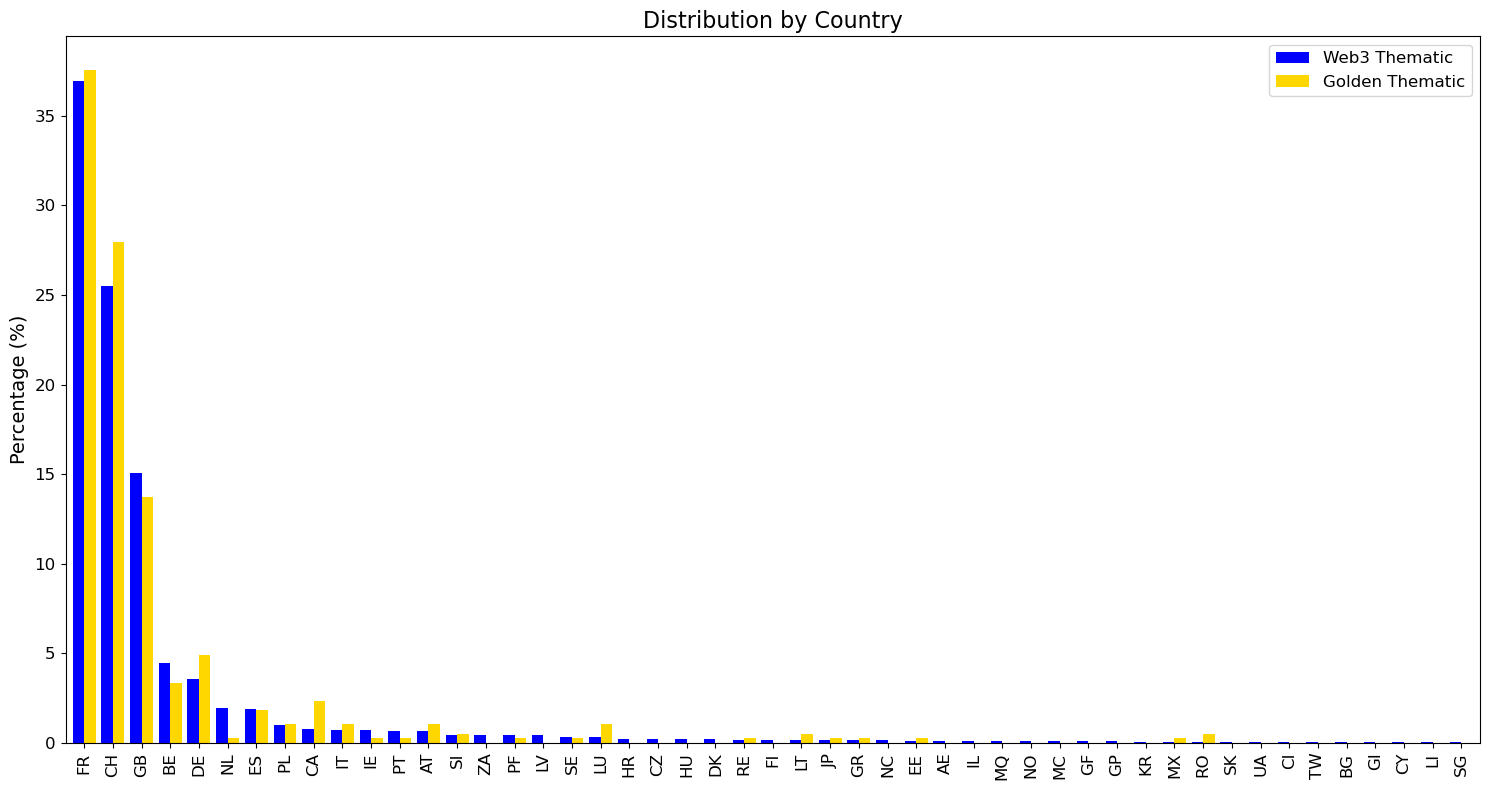

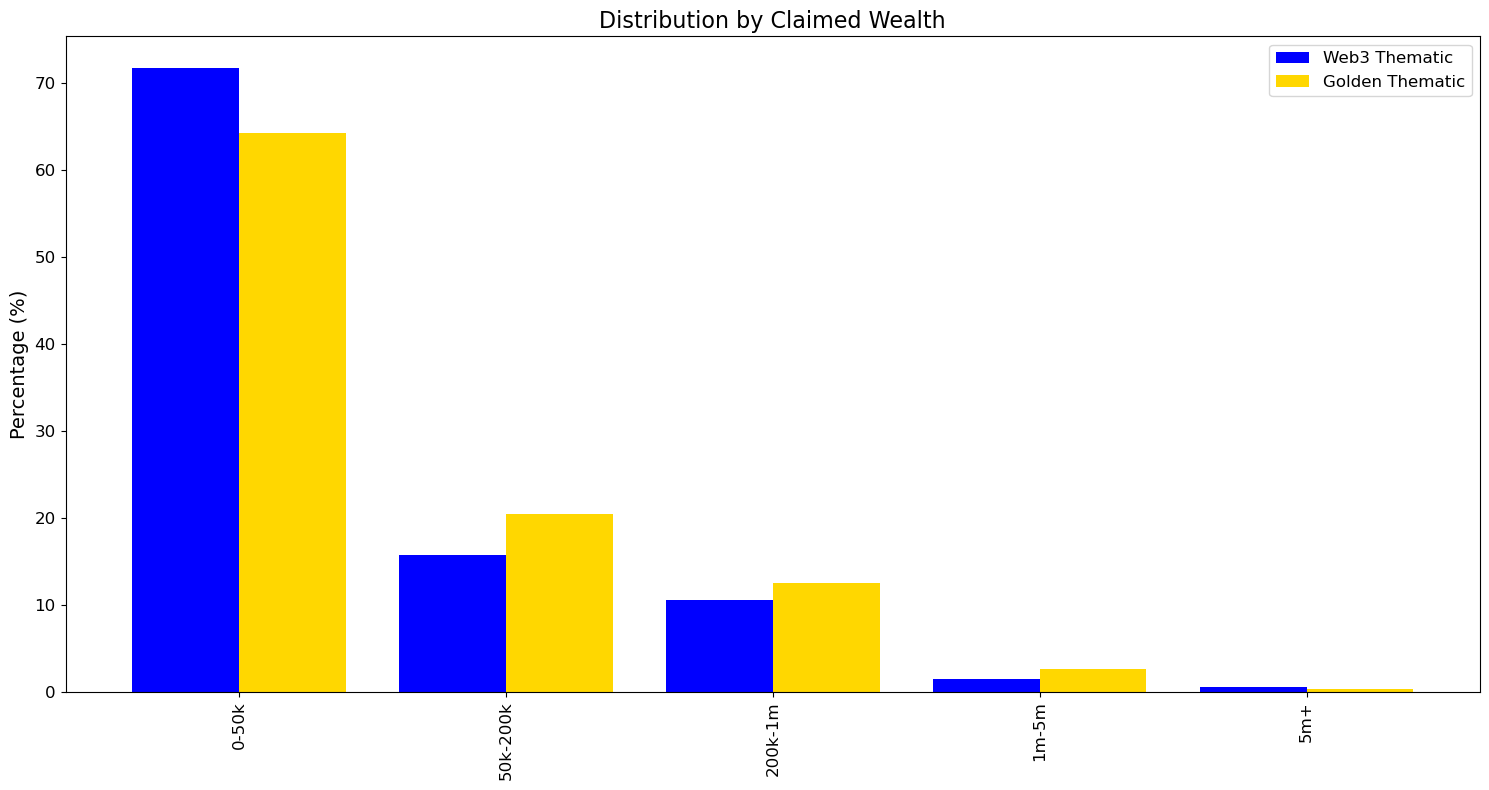

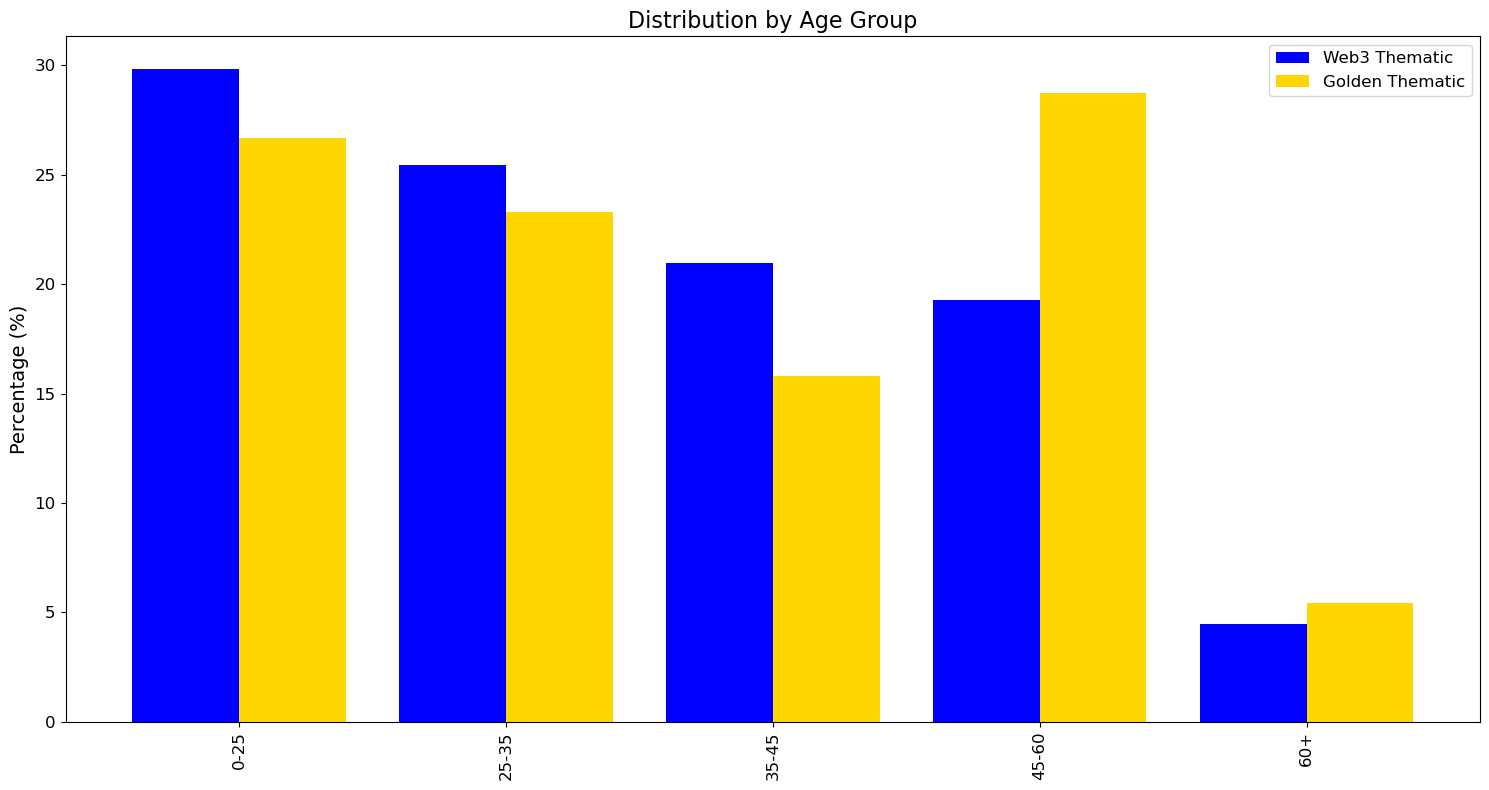

In [41]:
wealth_labels = ['0-50k', '50k-200k', '200k-1m', '1m-5m', '5m+']
age_labels = ['0-25', '25-35', '35-45', '45-60', '60+']

def larger_label_plot_cohort(df, title, labels=None):
    if labels:
        dff = df.copy()
        df.index = labels
    ax = df.plot(kind="bar", figsize=(15, 8), color=["blue", "gold"], width=0.8)
    plt.title(title, fontsize=16)
    plt.ylabel("Percentage (%)", fontsize=14)
    plt.xlabel(df.index.name, fontsize=14)
    plt.grid(False)  # Remove grid lines
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plots with larger labels
larger_label_plot_cohort(country_cohort, "Distribution by Country")
larger_label_plot_cohort(wealth_cohort, "Distribution by Claimed Wealth", wealth_labels)
larger_label_plot_cohort(age_cohort, "Distribution by Age Group", age_labels)

In [42]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract the Golden Thematic data for the first week after its launch
first_week_golden = transaction_summary[
    (transaction_summary["timestamp"] >= launch_date_gold) & 
    (transaction_summary["timestamp"] <= end_date_gold) &
    (transaction_summary["golden_thematic_purchase_usd"].notna())
]

# Count the number of users who invested in the Golden Thematic for each day of the week
daily_users = first_week_golden.groupby(first_week_golden["timestamp"].dt.date)["user_id"].nunique()

# Convert the date to ordinal format to be used as feature in the linear regression model
X = np.array([date.toordinal() for date in daily_users.index]).reshape(-1, 1)
y = daily_users.values

# Train a simple linear regression model
lr = LinearRegression().fit(X, y)

# Predict for the next periods (let's say 3 weeks)
next_days = 21
future_days = np.array([date.toordinal() for date in pd.date_range(end_date_gold, periods=next_days)]).reshape(-1, 1)

# Predictions
pessimistic_pred = lr.predict(future_days) * pessimistic_multiplier
realistic_pred = lr.predict(future_days) * realistic_multiplier
optimistic_pred = lr.predict(future_days) * optimistic_multiplier

future_days_dates = pd.date_range(end_date_gold, periods=next_days)

pessimistic_pred, realistic_pred, optimistic_pred, future_days_dates


(array([   0.875,   -7.   ,  -14.875,  -22.75 ,  -30.625,  -38.5  ,
         -46.375,  -54.25 ,  -62.125,  -70.   ,  -77.875,  -85.75 ,
         -93.625, -101.5  , -109.375, -117.25 , -125.125, -133.   ,
        -140.875, -148.75 , -156.625]),
 array([   1.3125,  -10.5   ,  -22.3125,  -34.125 ,  -45.9375,  -57.75  ,
         -69.5625,  -81.375 ,  -93.1875, -105.    , -116.8125, -128.625 ,
        -140.4375, -152.25  , -164.0625, -175.875 , -187.6875, -199.5   ,
        -211.3125, -223.125 , -234.9375]),
 array([   1.75,  -14.  ,  -29.75,  -45.5 ,  -61.25,  -77.  ,  -92.75,
        -108.5 , -124.25, -140.  , -155.75, -171.5 , -187.25, -203.  ,
        -218.75, -234.5 , -250.25, -266.  , -281.75, -297.5 , -313.25]),
 DatetimeIndex(['2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28',
                '2023-07-29', '2023-07-30', '2023-07-31', '2023-08-01',
                '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05',
                '2023-08-06', '2023-08-07', '2023-08-08', '2